In [1]:
from matplotlib import pyplot as plt
from tifffile import imread
import numpy as np
import pickle
from hydra.experimental import compose, initialize
import os
import torch
from lpu3dnet.frame import vqgan
from lpu3dnet.frame import transformer

# initialize configuration parameters for a specific experiment
experiment = 'ex12'
initialize(config_path=f"../config/{experiment}")
cfg_vqgan = compose(config_name="vqgan")
cfg_transformer = compose(config_name="transformer")
cfg_dataset = compose(config_name="dataset")

def read_pickle(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)
    

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/hydra/experimental/initialize.py:43: UserWarning: hydra.experimental.initialize() is no longer experimental. Use hydra.initialize()
  deprecation_warning(message=message)
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/hydra/experimental/initialize.py:45: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  self.delegate = real_initialize(
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/hydra/experimental/compose.py:25: UserWarning: hydra.experimental.compose() is no longer experimental. Use hydra.compose()
  deprecation_warning(message=message)


#### Check physical attributes

VQVAE sampled $64^3$ block

In [4]:
# read pickle file
real_phys = read_pickle(f'db/real_phys.pkl')
generate_phys = read_pickle(f'db/generate_phys.pkl')

In [14]:
phi_real = []
phi_gen = []
k_real = []
k_gen = []
eul_real = []
eul_gen = []

for ds_real, ds_gen in zip(real_phys,generate_phys):
    if ds_real and ds_gen:
        phi_real.append(ds_real['porosity'])
        phi_gen.append(ds_gen['porosity'])
        k_real.append(ds_real['kabs'][0])
        k_gen.append(ds_gen['kabs'][0])
        eul_real.append(ds_real['euler'])
        eul_gen.append(ds_gen['euler'])

Text(0, 0.5, 'generated euler')

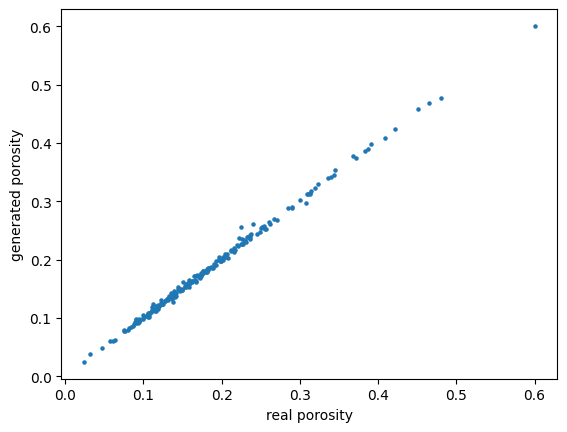

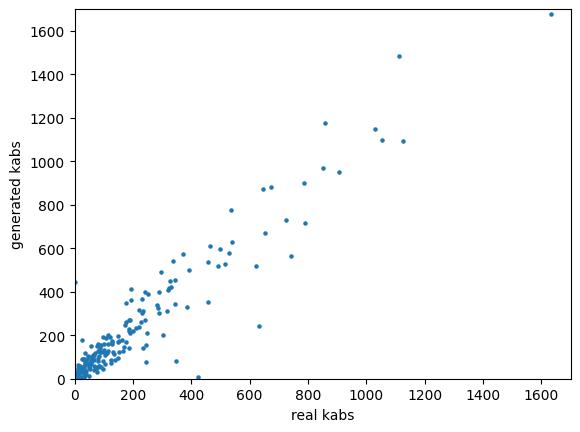

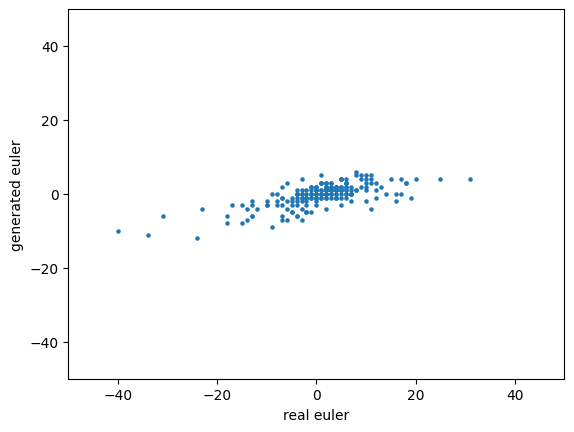

In [4]:
f = plt.figure()
plt.scatter(phi_real,phi_gen,s=5)
plt.xlabel('real porosity')
plt.ylabel('generated porosity')

f = plt.figure()
plt.scatter(k_real,k_gen,s=5)
plt.xlim([0,1700])
plt.ylim([0,1700])
plt.xlabel('real kabs')
plt.ylabel('generated kabs')

f = plt.figure()
plt.scatter(eul_real,eul_gen,s=5)
plt.xlim([-50,50])
plt.ylim([-50,50])
plt.xlabel('real euler')
plt.ylabel('generated euler')


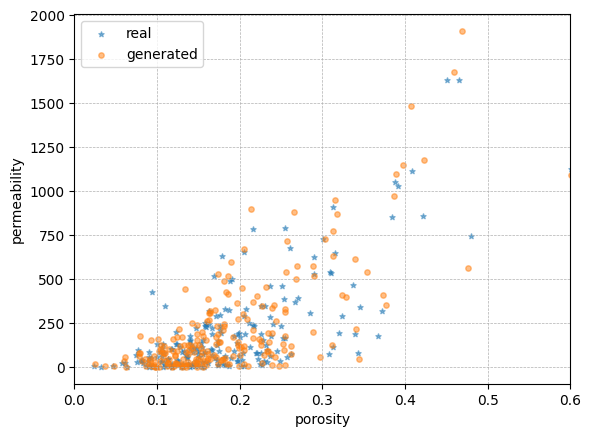

In [5]:
# phi vs kabs
f = plt.figure()
plt.scatter(phi_real,k_real,marker='*',s=15,alpha=0.5,label='real')
plt.scatter(phi_gen,k_gen,marker='o',s=15,alpha=0.5,label='generated')
plt.xlabel('porosity')
plt.ylabel('permeability')
plt.xlim([0,0.6])
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)






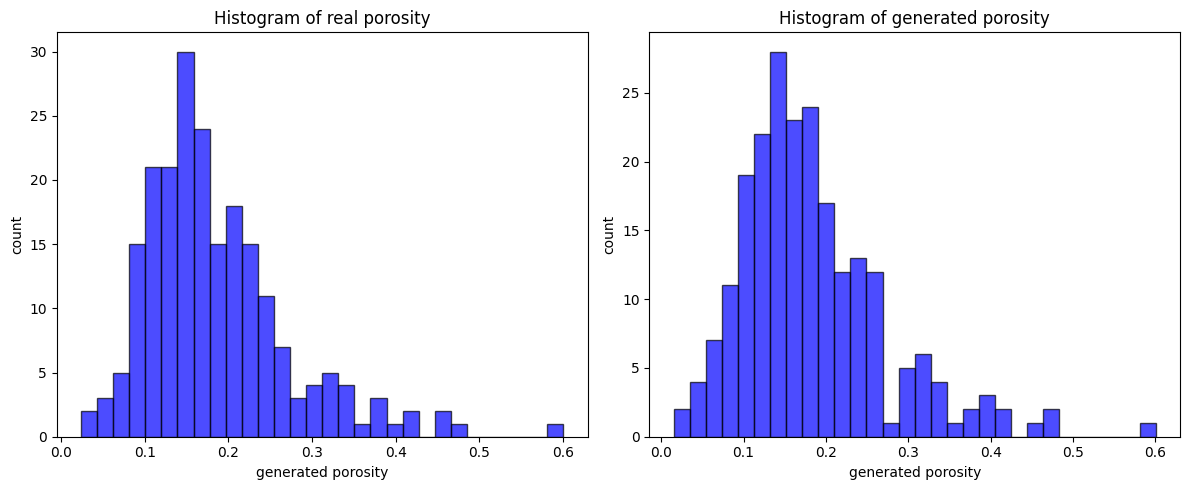

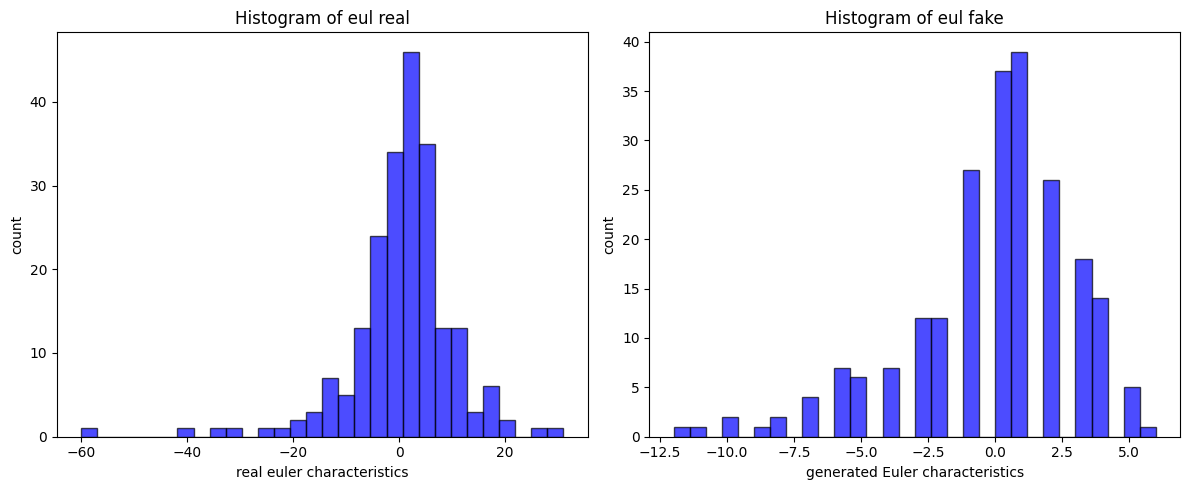

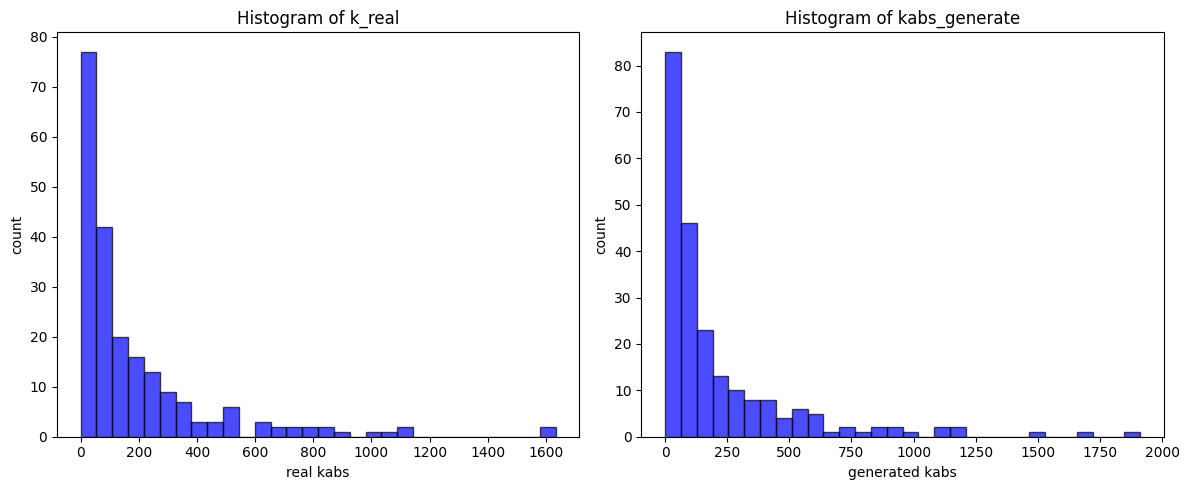

In [9]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first histogram
ax[0].hist(phi_real, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
ax[0].set_xlabel('generated porosity')
ax[0].set_ylabel('count')
ax[0].set_title('Histogram of real porosity')

# Plot the second histogram
ax[1].hist(phi_gen, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
ax[1].set_xlabel('generated porosity')
ax[1].set_ylabel('count')
ax[1].set_title('Histogram of generated porosity')

# Display the figure with the histograms
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure
plt.show()



f, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first histogram
ax[0].hist(eul_real, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
ax[0].set_xlabel('real euler characteristics')
ax[0].set_ylabel('count')
ax[0].set_title('Histogram of eul real')

# Plot the second histogram
ax[1].hist(eul_gen, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
ax[1].set_xlabel('generated Euler characteristics')
ax[1].set_ylabel('count')
ax[1].set_title('Histogram of eul fake')

# Display the figure with the histograms
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure
plt.show()




f, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first histogram
ax[0].hist(k_real, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
ax[0].set_xlabel('real kabs')
ax[0].set_ylabel('count')
ax[0].set_title('Histogram of k_real')

# Plot the second histogram
ax[1].hist(k_gen, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
ax[1].set_xlabel('generated kabs')
ax[1].set_ylabel('count')
ax[1].set_title('Histogram of kabs_generate')

# Display the figure with the histograms
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure
plt.show()


In [15]:
transformer_phys = read_pickle(f'db/generate_phys_transformer.pkl')

phi_gen = []
k_gen = []
eul_gen = []

for ds_gen in transformer_phys:
    if ds_gen:
        phi_gen.append(ds_gen['porosity'])
        k_gen.append(ds_gen['kabs'][0])
        eul_gen.append(ds_gen['euler'])

#### Transformer sampled $64^3$ block

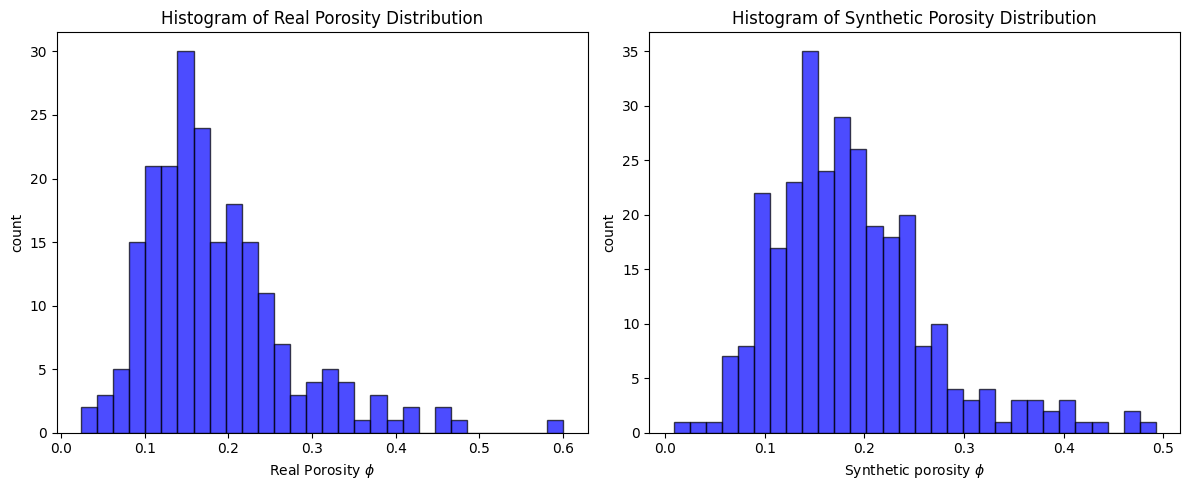

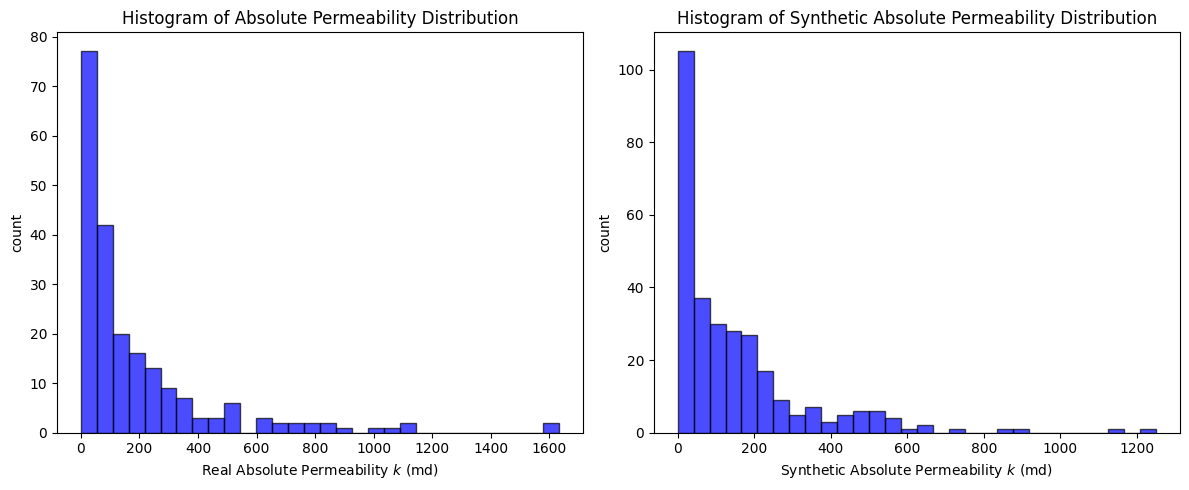

In [17]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first histogram
ax[0].hist(phi_real, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
ax[0].set_xlabel('Real Porosity $\phi$')
ax[0].set_ylabel('count')
ax[0].set_title('Histogram of Real Porosity Distribution')

# Plot the second histogram
ax[1].hist(phi_gen, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
ax[1].set_xlabel('Synthetic porosity $\phi$')
ax[1].set_ylabel('count')
ax[1].set_title('Histogram of Synthetic Porosity Distribution')

# Display the figure with the histograms
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure
plt.show()

# f, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# # Plot the first histogram
# ax[0].hist(eul_real, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
# ax[0].set_xlabel('real euler characteristics')
# ax[0].set_ylabel('count')
# ax[0].set_title('Histogram of eul real')

# # Plot the second histogram
# ax[1].hist(eul_gen, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
# ax[1].set_xlabel('generated Euler characteristics')
# ax[1].set_ylabel('count')
# ax[1].set_title('Histogram of eul fake')

# # Display the figure with the histograms
# plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure
# plt.show()


f, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first histogram
ax[0].hist(k_real, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
ax[0].set_xlabel('Real Absolute Permeability $k$ (md)')
ax[0].set_ylabel('count')
ax[0].set_title('Histogram of Absolute Permeability Distribution')

# Plot the second histogram
ax[1].hist(k_gen, bins=30, edgecolor='black', facecolor='blue', alpha=0.7)
ax[1].set_xlabel('Synthetic Absolute Permeability $k$ (md)')
ax[1].set_ylabel('count')
ax[1].set_title('Histogram of Synthetic Absolute Permeability Distribution')

# Display the figure with the histograms
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure
plt.show()

In [2]:
from lpu3dnet.inference import block_generation_singlecond

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

block_generator = block_generation_singlecond.Block_generator_stochastic(
    cfg_dataset,
    cfg_vqgan,
    cfg_transformer,
    epoch_vqgan=25,
    epoch_transformer=75,
    device = device,
    volume_dimension=3
    )

block_generator.generate_block()

number of parameters: 183.73M


#### Visualize individual blocks

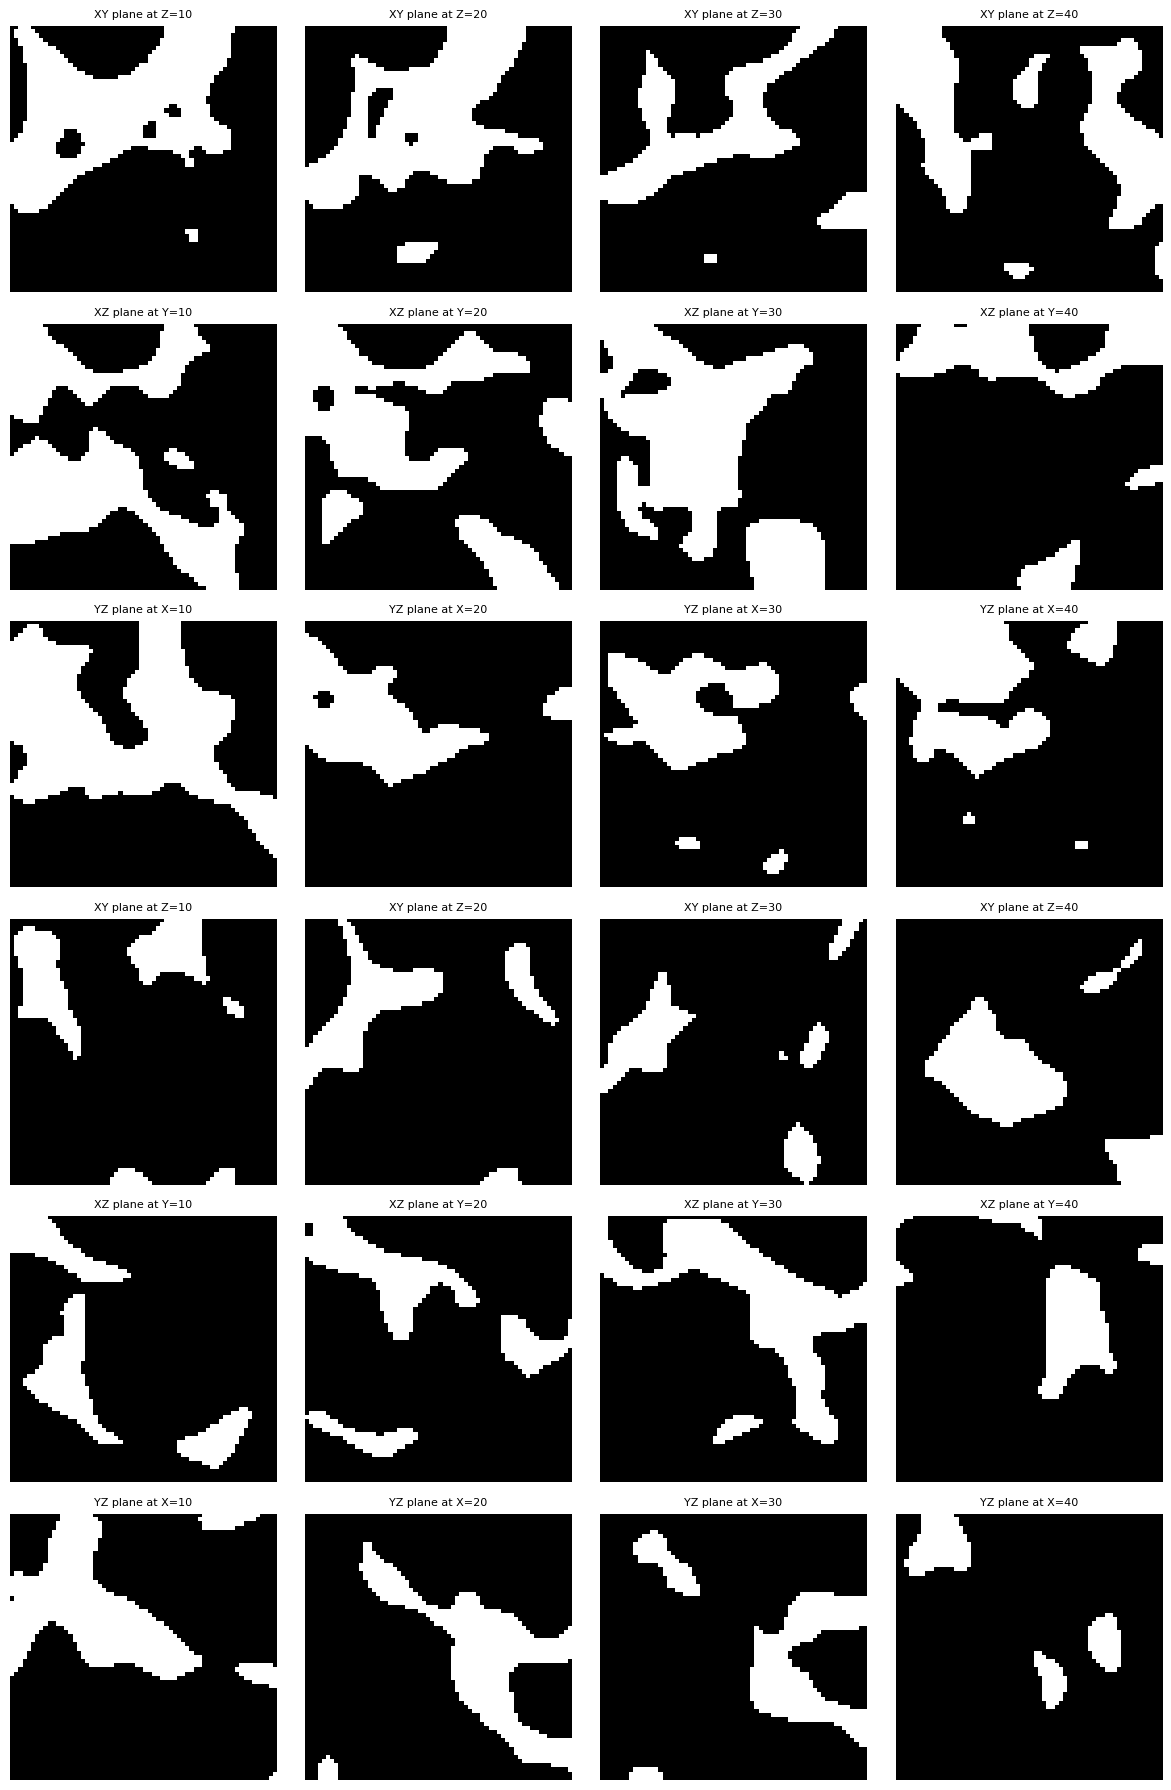

In [23]:
ds_data  = block_generator.ds_spatial
img_list = []
for coord in ds_data.keys():
    ds = ds_data[coord]
    img_list.append(ds['img'])

img_arr = np.array(img_list)
import random


def visualize_planes_grid_extended(img_arr):
    fig, axs = plt.subplots(6, 4, figsize=(12, 18))
    
    # Select two different random image indices
    img_index_1 = random.randint(0, img_arr.shape[0] - 1)
    img_index_2 = random.randint(0, img_arr.shape[0] - 1)
    
    # Define the slice indices to demonstrate the evolution with steps of 10
    slice_indices = [10, 20, 30, 40]
    
    for i in range(6):
        for j in range(4):
            if i < 3:  # First three rows, using img_index_1
                img_index = img_index_1
            else:  # Last three rows, using img_index_2
                img_index = img_index_2
            
            # Determine the plane and slice index based on the row
            if i % 3 == 0:  # XY plane evolution in the first and fourth row
                slice_index = slice_indices[j]
                slice_2d = img_arr[img_index, :, :, slice_index]
                title = f'XY plane at Z={slice_index}'
            elif i % 3 == 1:  # XZ plane evolution in the second and fifth row
                slice_index = slice_indices[j]
                slice_2d = img_arr[img_index, slice_index, :, :]
                title = f'XZ plane at Y={slice_index}'
            else:  # YZ plane evolution in the third and sixth row
                slice_index = slice_indices[j]
                slice_2d = img_arr[img_index, :, slice_index, :]
                title = f'YZ plane at X={slice_index}'
            
            # Display the 2D slice
            axs[i, j].imshow(slice_2d, cmap='gray')
            axs[i, j].set_title(title, fontsize=8)
            axs[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_planes_grid_extended(img_arr)


In [2]:
from lpu3dnet.inference import block_generation_singlecond
from lpu3dnet.inference import block_generation

def visualize_planes_grid_single(img_arr):
    """
    Visualizes 2D slices from a single 3D image in a 3x6 grid.
    
    Parameters:
    img_arr (numpy.ndarray): A 3D numpy array with shape (196, 196, 196).
    """
    # Define the slice indices for visualization
    slice_indices = [20, 50, 80, 110, 140, 170]

    # Create a 3x6 grid for visualization
    fig, axs = plt.subplots(3, 6, figsize=(18, 9))

    for i in range(3):  # Three different planes
        for j in range(6):  # Six different slices
            slice_index = slice_indices[j]

            # Determine the plane and slice to display
            if i == 0:  # XY plane evolution
                slice_2d = img_arr[:, :, slice_index]
                title = f'XY plane at Z={slice_index}'
            elif i == 1:  # XZ plane evolution
                slice_2d = img_arr[:, slice_index, :]
                title = f'XZ plane at Y={slice_index}'
            else:  # YZ plane evolution
                slice_2d = img_arr[slice_index, :, :]
                title = f'YZ plane at X={slice_index}'

            # Display the 2D slice
            axs[i, j].imshow(slice_2d, cmap='gray')
            axs[i, j].set_title(title, fontsize=8)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()



number of parameters: 183.73M


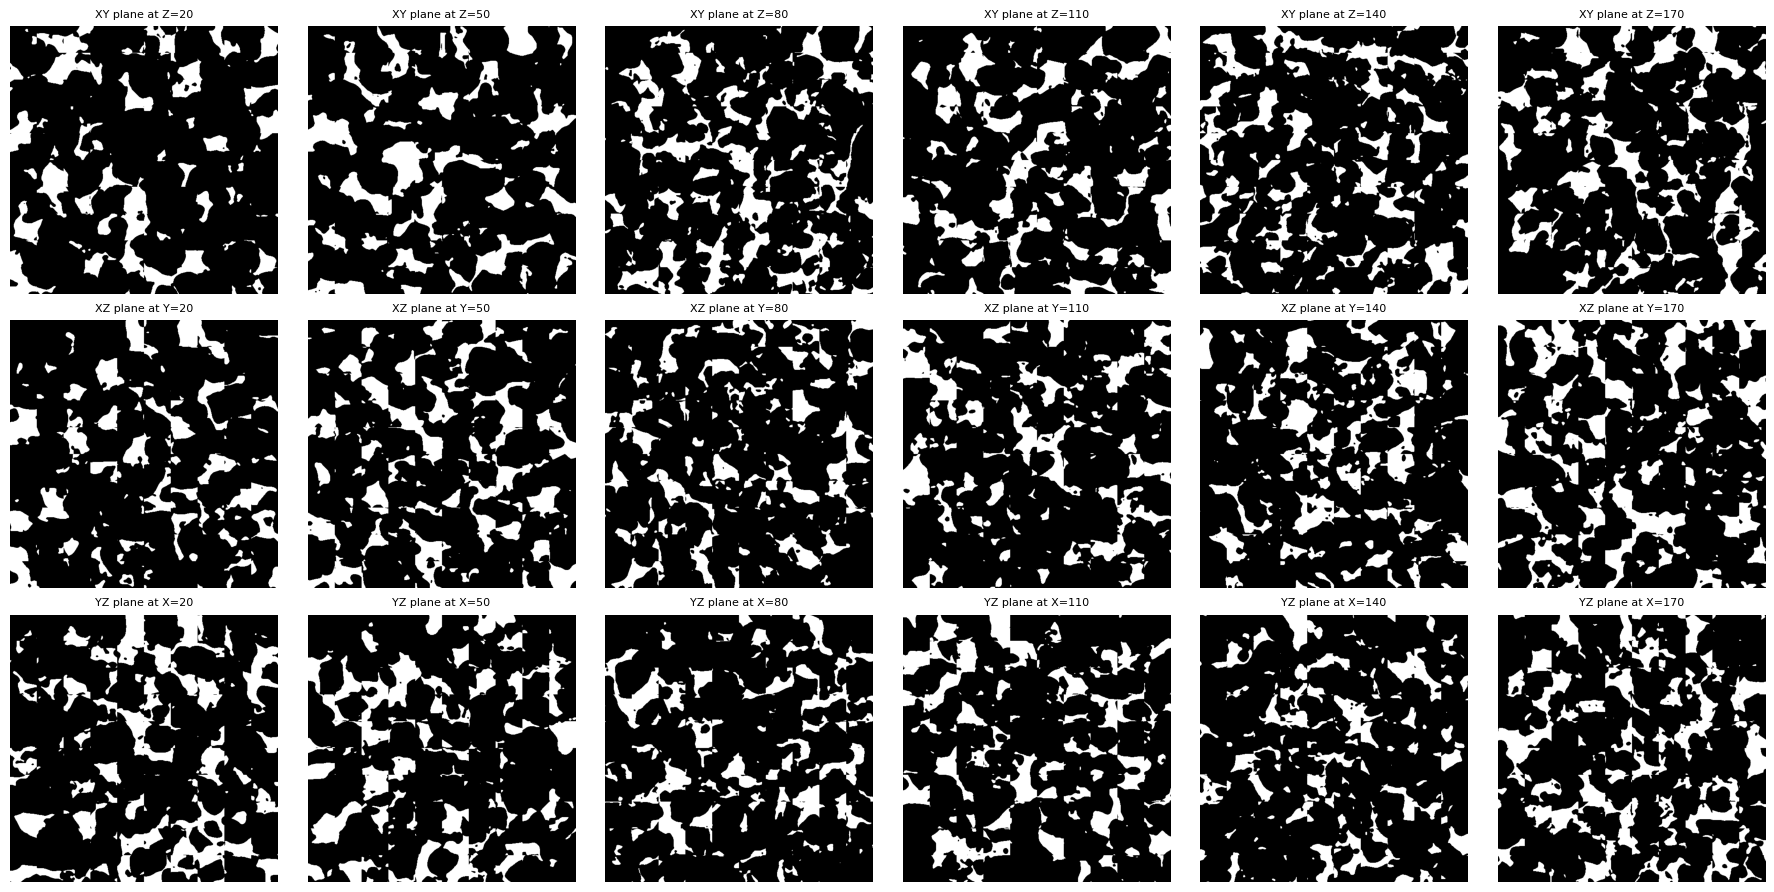

In [3]:
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

block_generator = block_generation_singlecond.Block_generator_stochastic(
    cfg_dataset,
    cfg_vqgan,
    cfg_transformer,
    epoch_vqgan=25,
    epoch_transformer=50,
    device = device,
    volume_dimension=10
    )

block_generator.generate_block(repeat=4)

def get_volume_shape(ds_spatial):
    max_i, max_j, max_k = 0, 0, 0
    for ijk in ds_spatial.keys():
        i, j, k = ijk
        max_i = max(max_i, i)
        max_j = max(max_j, j)
        max_k = max(max_k, k)
    return max_i + 1, max_j + 1, max_k + 1

def assemble_volume(ds_spatial):
    volume_shape = get_volume_shape(ds_spatial)
    volume = np.zeros((volume_shape[0] * 64, volume_shape[1] * 64, volume_shape[2] * 64))

    for ijk, data in ds_spatial.items():
        i, j, k = ijk
        image = data['img']
        volume[i*64:(i+1)*64, j*64:(j+1)*64, k*64:(k+1)*64] = image

    return volume

volume = assemble_volume(block_generator.ds_spatial)
# plt.imshow(volume[:,90,:], cmap='gray')
visualize_planes_grid_single(volume)

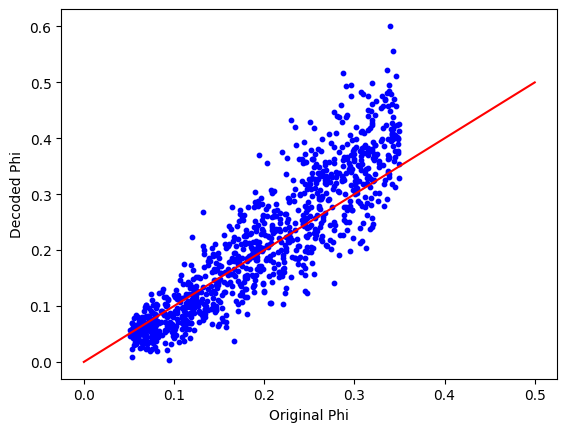

In [5]:
phi_list = []
phi_gen_list = []


from cpgan.ooppnm import img_process
img_prc = img_process.Image_process()

ds_spatial = block_generator.ds_spatial
for keys in ds_spatial.keys():
    phi_list.append(ds_spatial[keys]['phi'])
    img = ds_spatial[keys]['img']
    phi_gen = img_prc.phi(img)
    phi_gen_list.append(phi_gen)



f = plt.figure()
val_max = 0.5
plt.scatter(phi_list, phi_gen_list,s=10,c='b')
plt.plot([0,val_max],[0,val_max],c='r')
# plt.xlim([0,val_max])
# plt.ylim([0,val_max])
plt.xlabel('Original Phi')
plt.ylabel('Decoded Phi')
plt.show()

In [12]:
a = [1,2,3,4,5,6,7,8,9,0,20]
patch_num = 8

a[-patch_num:]

[4, 5, 6, 7, 8, 9, 0, 20]

In [14]:
print(block_generator.windows_idx[0])
block_generator.windows_idx[-1]

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


[(1, 1, 1),
 (1, 1, 2),
 (1, 2, 1),
 (1, 2, 2),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 1),
 (2, 2, 2)]

0.017299652099609375 0.07919234037399292


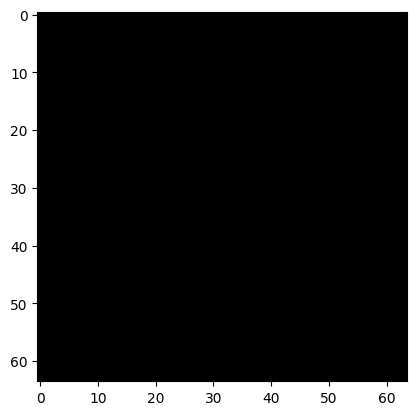

In [5]:
# plot the image
image = block_generator.ds_spatial[(0,0,0)]['img']
print(block_generator.ds_spatial[(0,0,0)]['phi_gen'], block_generator.ds_spatial[(0,0,0)]['phi'])

f = plt.figure()
plt.imshow(image[0], cmap='gray')
plt.show()

In [20]:
# load transformer and autoencoder
epoch_vqgan = 25
epoch_transformer = 280
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

root_path = os.path.join(cfg_dataset.checkpoints.PATH, cfg_dataset.experiment)

vqgan_path = os.path.join(root_path,f'vqgan_epoch_{epoch_vqgan}.pth')
transformer_path = os.path.join(root_path,'transformer',f'transformer_epoch_{epoch_transformer}.pth')

model_vqgan = vqgan.VQGAN(cfg_vqgan)
model_transformer = transformer.Transformer(cfg_transformer)

model_vqgan.load_checkpoint(vqgan_path)
model_transformer.load_checkpoint(transformer_path)

model_vqgan = model_vqgan.to(device)
model_transformer = model_transformer.to(device)

model_transformer.eval()
model_vqgan.eval()

number of parameters: 183.94M


VQGAN(
  (encoder): Encoder(
    (model): Sequential(
      (0): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): ResidualBlock(
        (block): Sequential(
          (0): GroupNorm(
            (gn): GroupNorm(16, 16, eps=1e-06, affine=True)
          )
          (1): Swish()
          (2): Conv3d(16, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (3): GroupNorm(
            (gn): GroupNorm(16, 64, eps=1e-06, affine=True)
          )
          (4): Swish()
          (5): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        )
        (channel_up): Conv3d(16, 64, kernel_size=(1, 1, 1), stride=(1, 1, 1))
      )
      (2): ResidualBlock(
        (block): Sequential(
          (0): GroupNorm(
            (gn): GroupNorm(16, 64, eps=1e-06, affine=True)
          )
          (1): Swish()
          (2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (3): GroupNo

In [21]:
# some defulat parameters
large_img_size = 3
sub_img_size = 2
phi_large = 0.4
phi_small = 0.05
patch_num = 8
total_features = 64


from cpgan.ooppnm import img_process
img_prc = img_process.Image_process()

def generate_sliding_windows(volume_dimension, window_size=2):
    """
    Generates coordinates for sliding windows in a 3D cubic volume.
    Args:
    - volume_dimension: The size of the cubic volume
    - window_size: The size of the sliding window (default is 2 for a 2x2x2 window)
    Returns:
    - A list of lists, where each inner list contains tuples of (i, j, k) coordinates
      for all points within a window.
    """

    windows = []

    # Traverse the 3D volume
    for i in range(volume_dimension - window_size + 1):
        for j in range(volume_dimension - window_size + 1):
            for k in range(volume_dimension - window_size + 1):
                # Initialize the current window's list of coordinates
                current_window = []
                
                # Populate the current window with coordinates
                for di in range(window_size):
                    for dj in range(window_size):
                        for dk in range(window_size):
                            current_window.append((i+di, j+dj, k+dk))
                
                # Add the current window's coordinates to the main list
                windows.append(current_window)

    return windows


def expand_cond_single(cond_base):
     features_num = 64
     cond_flatten = cond_base.unsqueeze(0).expand(features_num, -1)
     return cond_flatten.unsqueeze(0).float()


def init_ds_spatial_info(volume_dimension):
    ds = {}
    for i in range(volume_dimension):
        for j in range(volume_dimension):
            for k in range(volume_dimension):
                # store spatial info
                ds[(i, j, k)] = {}
                phi_gen = torch.rand(1) * (phi_large - phi_small) + phi_small
                ds[(i, j, k)]['phi'] = phi_gen.item()
                ds[(i, j, k)]['token'] = None
                ds[(i, j, k)]['z'] = None
                ds[(i, j, k)]['cond'] = None
                ds[(i, j, k)]['img'] = None
                ds[(i, j, k)]['phi_gen'] = None
    return ds



def add_noise_to_cond(cond,device):
    b,seq_len,_ = cond.shape
    noise = torch.randn(b, seq_len, 1).to(device)
    cond = torch.cat([cond, noise], dim=-1)
    return cond

def gen_img_from_z(z):
    with torch.no_grad():
        img = model_vqgan.decode(z)
        img = img_prc.clean_img(img)[0]
    return img



windows_idx = generate_sliding_windows(large_img_size)
ds_spatial = init_ds_spatial_info(large_img_size)





In [20]:
#%% initialize (0,0,0)
sos_token = 3000
top_k = 2
temperature = 1

phi = ds_spatial[(0,0,0)]['phi']
cond_vec = torch.tensor([phi, 0, 0, 0]).to(device)
cond_vec = expand_cond_single(cond_vec)
# cond_vec = add_noise_to_cond(cond_vec,device)

sos_tokens = torch.ones(1, total_features) * sos_token
sos_tokens = sos_tokens.long().to(device)

token_nxt = model_transformer.model.sample(
    sos_tokens,
    cond_vec,
    temperature=temperature,
    top_k=top_k,
    features_num=total_features
    )

z_current = model_vqgan.tokens_to_z(token_nxt,total_features_vec_num=total_features)

ds_spatial[(0,0,0)]['cond'] = cond_vec
ds_spatial[(0,0,0)]['z'] = z_current
ds_spatial[(0,0,0)]['token'] = token_nxt
ds_spatial[(0,0,0)]['img'] = gen_img_from_z(z_current)
ds_spatial[(0,0,0)]['phi_gen'] = img_prc.phi(ds_spatial[(0,0,0)]['img'])
# filling in z in attention window


for slide_window_idx in windows_idx:
    flat_idx = 0
    # initialize aggregated vector in each window
    cond_window = []
    token_list = [sos_tokens]
    # create normalized ijk condition vector
    for i in range(sub_img_size):
        for j in range(sub_img_size):
            for k in range(sub_img_size):
                # get absolute
                abs_ijk = slide_window_idx[flat_idx]
                

                if ds_spatial[abs_ijk]['token'] is not None:
                    cond_vec = ds_spatial[abs_ijk]['cond'].clone()
                    token_current = ds_spatial[abs_ijk]['token'].clone()
                    cond_window.append(cond_vec)
                    token_list.append(token_current)
                    flat_idx += 1
                    continue # no need for inference
                

                
                phi = ds_spatial[abs_ijk]['phi']
                # generate conditional informatino
                cond_vec = torch.tensor([phi, i, j, k]).to(device)
                cond_vec = expand_cond_single(cond_vec)
                
                # add current conditioanl vector
                cond_window.append(cond_vec)
                cond_input = torch.cat(cond_window, dim=1)

                # aggregate previous tokens
                token_input = torch.cat(token_list, dim=1)
                print(token_input.shape, cond_input.shape)
                token_nxt = model_transformer.model.sample(token_input, cond_input,temperature=temperature,top_k=top_k,features_num=total_features)
                token_list.append(token_nxt)

                # update spatial ds
                ds_spatial[abs_ijk]['token'] = token_nxt
                ds_spatial[abs_ijk]['cond'] = cond_vec
                z_current = model_vqgan.tokens_to_z(token_nxt,total_features_vec_num=total_features)
                ds_spatial[abs_ijk]['z'] = z_current
                ds_spatial[abs_ijk]['img'] = gen_img_from_z(z_current)
                ds_spatial[abs_ijk]['phi_gen'] = img_prc.phi(ds_spatial[abs_ijk]['img'])
                
                flat_idx += 1

torch.Size([1, 128]) torch.Size([1, 128, 4])
torch.Size([1, 192]) torch.Size([1, 192, 4])
torch.Size([1, 256]) torch.Size([1, 256, 4])
torch.Size([1, 320]) torch.Size([1, 320, 4])
torch.Size([1, 384]) torch.Size([1, 384, 4])
torch.Size([1, 448]) torch.Size([1, 448, 4])
torch.Size([1, 512]) torch.Size([1, 512, 4])


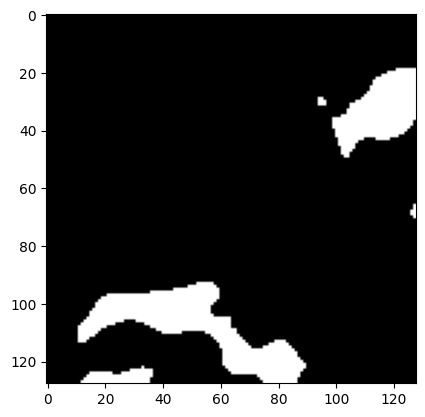

In [5]:
import numpy as np

def get_volume_shape(ds_spatial):
    max_i, max_j, max_k = 0, 0, 0
    for ijk in ds_spatial.keys():
        i, j, k = ijk
        max_i = max(max_i, i)
        max_j = max(max_j, j)
        max_k = max(max_k, k)
    return max_i + 1, max_j + 1, max_k + 1

def assemble_volume(ds_spatial):
    volume_shape = get_volume_shape(ds_spatial)
    volume = np.zeros((volume_shape[0] * 64, volume_shape[1] * 64, volume_shape[2] * 64))

    for ijk, data in ds_spatial.items():
        i, j, k = ijk
        image = data['img']
        volume[i*64:(i+1)*64, j*64:(j+1)*64, k*64:(k+1)*64] = image

    return volume

volume = assemble_volume(ds_spatial)
plt.imshow(volume[10], cmap='gray')

In [6]:
ds_spatial.keys()

dict_keys([(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)])

0.03514862060546875 0.18829196691513062


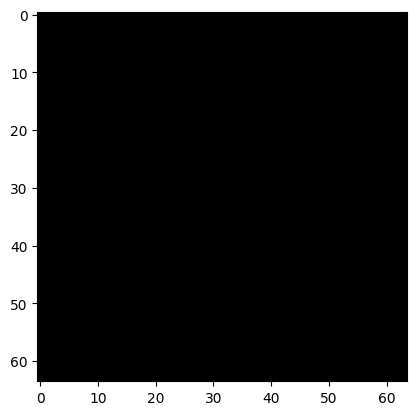

In [7]:
spatial_coord = (0,0,0)
sample_vol = ds_spatial[spatial_coord]['img']
print(ds_spatial[spatial_coord]['phi_gen'], ds_spatial[spatial_coord]['phi'])
plt.imshow(sample_vol[:,0,:], cmap='gray')

In [8]:
phi_list = []
phi_gen_list = []

for keys in ds_spatial.keys():
    phi_list.append(ds_spatial[keys]['phi'])
    img = ds_spatial[keys]['img']
    phi_gen = img_prc.phi(img)
    phi_gen_list.append(phi_gen)

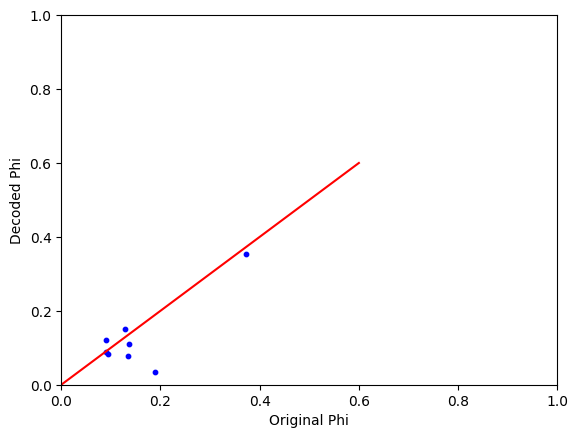

In [9]:

f = plt.figure()
plt.scatter(phi_list, phi_gen_list,s=10,c='b')
plt.plot([0,0.6],[0,0.6],c='r')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Original Phi')
plt.ylabel('Decoded Phi')
plt.show()